In [1]:
%matplotlib inline
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from collections import Counter, OrderedDict
import json
import missingno as msno

In [2]:
# загружаем датасет
df = pd.read_csv("USvideos.csv", encoding="utf-8")
with open("US_category_id.json") as f:
    tmp = json.load(f)["items"]
categories = {i["id"]: i for i in tmp}
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


<AxesSubplot:>

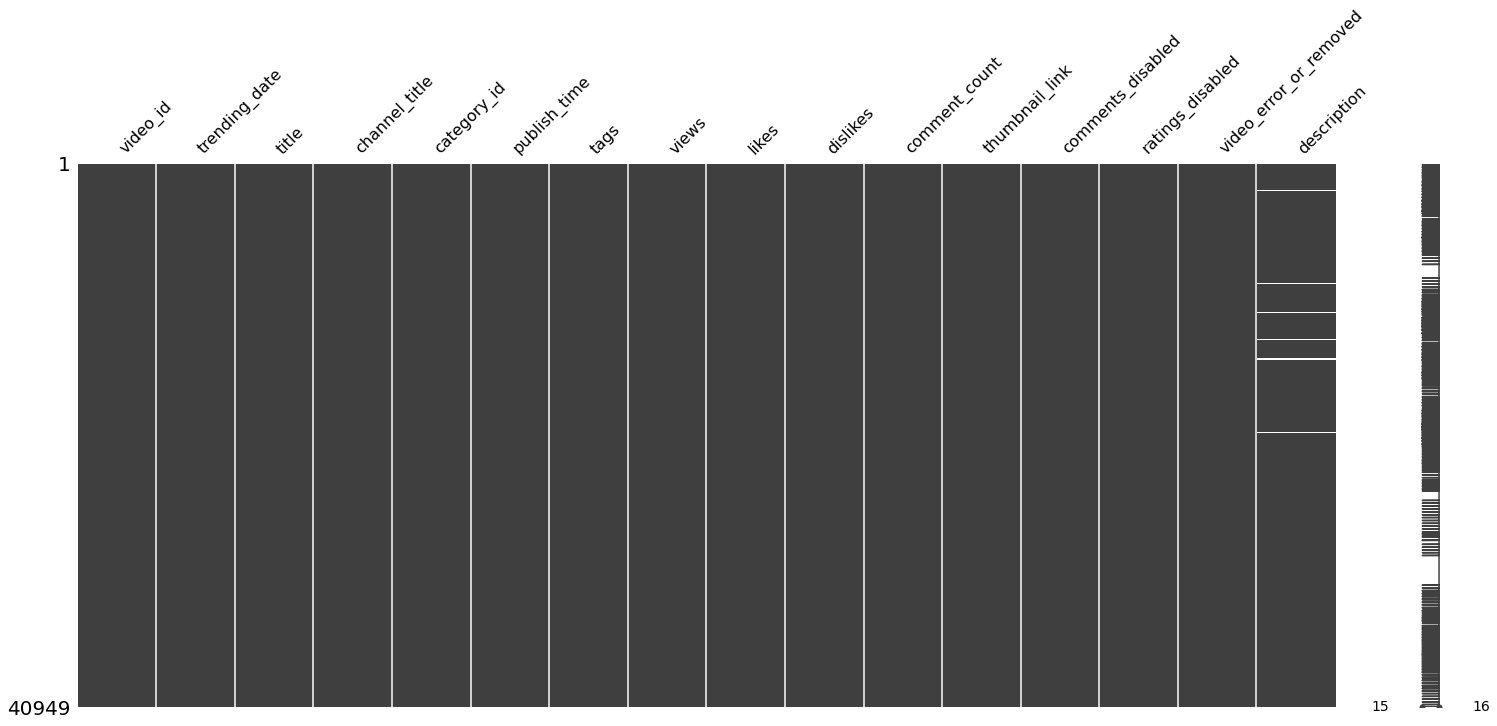

In [3]:
# в каких колонках есть пустые значения
msno.matrix(df)

In [4]:
# выбросим ненужные столбцы
df = df.drop(columns=["thumbnail_link"])

In [5]:
# заменяем id категории на ее название (из файла US_category_id.json)
def rewrite_categories(i):
    return categories[str(i)]["snippet"]["title"]

df["category_id"] = df["category_id"].apply(rewrite_categories)
df = df.rename(columns={"category_id": "category"})

In [6]:
# конвертируем дату выхода в тренда и дату публикации из строки в datetime
df["trending_date"] = pd.to_datetime(df["trending_date"], format="%y.%d.%m")
df["publish_time"] = pd.to_datetime(df["publish_time"], format="%Y-%m-%dT%H:%M:%S.%fZ")
df[["trending_date", "publish_time"]].head()

,trending_date,publish_time
0,2017-11-14,2017-11-13 17:13:01
1,2017-11-14,2017-11-13 07:30:00
2,2017-11-14,2017-11-12 19:05:24
3,2017-11-14,2017-11-13 11:00:04
4,2017-11-14,2017-11-12 18:01:41


In [7]:
# конвертируем список тегов в list
def to_list(s):
    return list(s.replace('"', '').split('|'))

df.loc[df["tags"] == "[none]", "tags"] = ""
df["tags"] = df["tags"].apply(to_list)
df[["tags"]].head()

,tags
0,[SHANtell martin]
1,"[last week tonight trump presidency, last week..."
2,"[racist superman, rudy, mancuso, king, bach, r..."
3,"[rhett and link, gmm, good mythical morning, r..."
4,"[ryan, higa, higatv, nigahiga, i dare you, idy..."


In [8]:
# нормализованный датасет
df.head()

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,2017-11-13 17:13:01,[SHANtell martin],748374,57527,2966,15954,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13 07:30:00,"[last week tonight trump presidency, last week...",2418783,97185,6146,12703,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12 19:05:24,"[racist superman, rudy, mancuso, king, bach, r...",3191434,146033,5339,8181,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,2017-11-13 11:00:04,"[rhett and link, gmm, good mythical morning, r...",343168,10172,666,2146,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12 18:01:41,"[ryan, higa, higatv, nigahiga, i dare you, idy...",2095731,132235,1989,17518,False,False,False,I know it's been a while since we did this sho...


In [9]:
# сохраняем
df.to_pickle("df.pkl")
df_unique = df.drop_duplicates(subset="video_id", )
df_unique.to_pickle("df_unique.pkl")